# Surface inversion for the entire Columbia Basin 
### default, VAS, and with in situ av. SMB gradient and optimized Glen's A

In [1]:
# Python imports
import logging

# Libs
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import shapely.geometry as shpg

# Locals
from oggm import cfg, utils, workflow, tasks, graphics
from oggm.workflow import execute_entity_task, gis_prepro_tasks, climate_tasks

# For timing the run
import time
start = time.time()

# Module logger
log = logging.getLogger(__name__)

# Initialize OGGM and set up the run parameters --> Read the configuration file containing the run’s parameters.
cfg.initialize(logging_level='WORKFLOW')
rgi_version = '61' #60 
rgi_region = '02'  # Region WNA

cfg.PARAMS['border'] = 10
cfg.PARAMS['continue_on_error'] = True
cfg.PATHS['working_dir'] = utils.get_temp_dir('CB_all', reset=True)

#Glen's A
cfg.PARAMS['inversion_glen_a'] = 3.39e-24 
cfg.PARAMS['glen_a'] = 3.39e-24 

### VAS model params
# area-volume scaling parameters for glaciers (cp. Marzeion et. al., 2012)
# units: m^(3-2*gamma) and unitless, respectively
cfg.PARAMS['vas_c_area_m2'] = 0.064
cfg.PARAMS['vas_gamma_area'] = 1.083
# RGI file
path = utils.get_rgi_region_file(rgi_region, version=rgi_version)
rgidf = gpd.read_file(path)

# Get the Columbia Basin file
path = '/home/pelto/GIS/BCProv/CBT/cbt_basin_84.shp'
basin = gpd.read_file(path)

# Take all glaciers in the Columbia Basin
in_bas = [basin.geometry.contains(shpg.Point(x, y))[0] for
          (x, y) in zip(rgidf.CenLon, rgidf.CenLat)]
rgidf = rgidf.loc[in_bas]

# Sort for more efficient parallel computing
rgidf = rgidf.sort_values('Area', ascending=False)

log.workflow('Starting OGGM run')
log.workflow('Number of glaciers: {}'.format(len(rgidf)))

gdirs = workflow.init_glacier_regions(rgidf, reset=True, force=True, from_prepro_level=3) 

# Log
m, s = divmod(time.time() - start, 60)
h, m = divmod(m, 60)
log.workflow('OGGM is done! Time needed: %d:%02d:%02d' % (h, m, s))

2019-10-16 15:51:14: oggm.cfg: Using configuration file: /home/pelto/anaconda2/envs/oggm_env/lib/python3.6/site-packages/oggm/params.cfg
2019-10-16 15:51:24: __main__: Starting OGGM run
2019-10-16 15:51:24: __main__: Number of glaciers: 2083
2019-10-16 15:51:24: oggm.workflow: init_glacier_regions from prepro level 3 on 2083 glaciers.
2019-10-16 15:51:24: oggm.workflow: Execute entity task gdir_from_prepro on 2083 glaciers
2019-10-16 15:51:24: oggm.workflow: Multiprocessing: using all available processors (N=8)
2019-10-16 15:55:52: __main__: OGGM is done! Time needed: 0:04:37
2019-10-16 15:56:16: oggm.core.inversion: FileNotFoundError occurred during task distribute_thickness_per_altitude on RGI60-02.06153: [Errno 2] No such file or directory: b'/tmp/OGGM/CB_all/per_glacier/RGI60-02/RGI60-02.06/RGI60-02.06153/gridded_data.nc'
2019-10-16 15:56:43: oggm.core.inversion: FileNotFoundError occurred during task distribute_thickness_per_altitude on RGI60-02.03976: [Errno 2] No such file or di

In [2]:
utils.compile_glacier_statistics(gdirs, filesuffix='_default', path=True)
import os
WORKING_DIR = cfg.PATHS['working_dir']
ds_default = pd.read_csv(os.path.join(WORKING_DIR, 'glacier_statistics_default.csv'), index_col=0)
ds_default

2019-10-16 15:55:52: oggm.workflow: Execute entity task glacier_statistics on 2083 glaciers


,rgi_region,rgi_subregion,name,cenlon,cenlat,rgi_area_km2,glacier_type,terminus_type,status,inv_volume_km3,...,flowline_min_elev,flowline_avg_width,flowline_avg_slope,t_star,mu_star_glacierwide,mu_star_flowline_avg,mu_star_allsame,mb_bias,error_task,error_msg
rgi_id,,,,,,,,,,,,,,,,,,,,,
RGI60-02.06860,2,02-03,NaN,-117.866,52.1689,43.951,Glacier,Land-terminating,Glacier or ice cap,4.647800,...,1347.577052,2788.945999,0.174061,1950.0,87.664435,87.699362,False,329.148772,NaN,NaN
RGI60-02.06859,2,02-03,NaN,-117.759,52.1779,33.983,Glacier,Land-terminating,Glacier or ice cap,5.096072,...,1428.276910,2337.850853,0.141274,1951.0,87.044441,87.116458,False,329.198750,NaN,NaN
RGI60-02.06862,2,02-03,NaN,-117.880,52.2096,20.588,Glacier,Land-terminating,Glacier or ice cap,2.384311,...,1654.324002,1892.627321,0.184673,1950.0,81.042323,81.042323,True,329.193124,NaN,NaN
RGI60-02.05099,2,02-03,NaN,-116.553,51.6181,17.854,Glacier,Land-terminating,Glacier or ice cap,2.367843,...,2085.041404,1960.254721,0.112694,1960.0,99.859858,99.859858,True,304.294704,NaN,NaN
RGI60-02.02171,2,02-03,NaN,-116.930,50.8069,16.898,Glacier,Land-terminating,Glacier or ice cap,1.775652,...,1877.053244,2004.032258,0.190630,1946.0,110.274153,110.305877,False,298.550866,NaN,NaN
RGI60-02.12435,2,02-03,NaN,-117.320,52.1245,16.769,Glacier,Land-terminating,Glacier or ice cap,2.750224,...,1700.083945,2691.221313,0.135295,1955.0,102.851837,102.851837,True,329.943305,NaN,NaN
RGI60-02.06799,2,02-03,NaN,-118.753,52.2041,16.400,Glacier,Land-terminating,Glacier or ice cap,2.354847,...,1551.935656,1653.892699,0.164823,1944.0,109.141430,109.141430,True,329.663260,NaN,NaN
RGI60-02.07002,2,02-03,NaN,-118.010,52.2116,16.033,Glacier,Land-terminating,Glacier or ice cap,2.295857,...,1913.640939,1868.648019,0.141850,1949.0,78.407303,78.407303,True,329.189542,NaN,NaN
RGI60-02.06149,2,02-03,NaN,-117.099,51.9153,15.814,Glacier,Land-terminating,Glacier or ice cap,2.013739,...,1931.665495,3071.872572,0.171247,1957.0,127.355334,127.490939,False,328.699181,NaN,NaN


In [3]:
print(ds_default.inv_volume_km3.sum())
print(ds_default.vas_volume_km3.sum())
print(ds_default.rgi_area_km2.sum())

125.70012113000071
96.93973604384959
1753.906


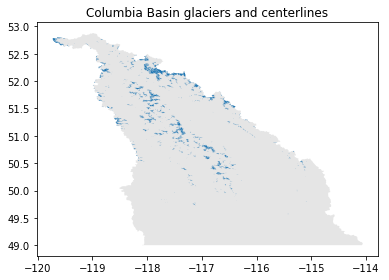

In [4]:
# utils.write_centerlines_to_shape(gdirs)
# centerlines = gpd.read_file(os.path.join(WORKING_DIR, 'glacier_centerlines.shp'))

f, ax = plt.subplots()
basin.plot(ax=ax, color='grey', alpha=0.2)
rgidf.plot(ax=ax, color='C0')
# centerlines.plot(ax=ax, color='C3')
plt.title('Columbia Basin glaciers and centerlines')
plt.tight_layout()
# plt.savefig(WORKING_DIR + 'Columbia_Basin.pdf', resolution=300)
plt.show()

In [5]:
# Print the standard MB gradient from OGGM default
from oggm.core.massbalance import ConstantMassBalance, MultipleFlowlineMassBalance

In [6]:
# See the result of the inversion
workflow.execute_entity_task(tasks.distribute_thickness_per_altitude, gdirs);

2019-10-16 15:56:01: oggm.workflow: Execute entity task distribute_thickness_per_altitude on 2083 glaciers


In [7]:
# Let's apply a linear MB instead
from oggm.core.climate import apparent_mb_from_linear_mb

grad = 6.43 #6.43 mm w.e. m-1 from all glaciological point data

workflow.execute_entity_task(tasks.apparent_mb_from_linear_mb, gdirs, mb_gradient=grad);

2019-10-16 15:59:00: oggm.workflow: Execute entity task apparent_mb_from_linear_mb on 2083 glaciers


In [8]:
# Now let's recompute the inversion based on this new gradient
workflow.execute_entity_task(tasks.prepare_for_inversion, gdirs)
workflow.execute_entity_task(tasks.mass_conservation_inversion, gdirs)
workflow.execute_entity_task(tasks.filter_inversion_output, gdirs) # unfortunately...
workflow.execute_entity_task(tasks.distribute_thickness_per_altitude, gdirs);

utils.compile_glacier_statistics(gdirs, path=True)

2019-10-16 15:59:02: oggm.workflow: Execute entity task prepare_for_inversion on 2083 glaciers
2019-10-16 15:59:02: oggm.workflow: Execute entity task mass_conservation_inversion on 2083 glaciers
2019-10-16 15:59:09: oggm.workflow: Execute entity task filter_inversion_output on 2083 glaciers
2019-10-16 15:59:09: oggm.workflow: Execute entity task distribute_thickness_per_altitude on 2083 glaciers
2019-10-16 16:01:48: oggm.workflow: Execute entity task glacier_statistics on 2083 glaciers


,rgi_region,rgi_subregion,name,cenlon,cenlat,rgi_area_km2,glacier_type,terminus_type,status,inv_volume_km3,...,flowline_min_elev,flowline_avg_width,flowline_avg_slope,t_star,mu_star_glacierwide,mu_star_flowline_avg,mu_star_allsame,mb_bias,error_task,error_msg
rgi_id,,,,,,,,,,,,,,,,,,,,,
RGI60-02.06860,02,02-03,,-117.866,52.1689,43.951,Glacier,Land-terminating,Glacier or ice cap,4.655925,...,1347.577052,2788.945999,0.174061,1950.0,87.664435,87.699362,False,329.148772,NaN,NaN
RGI60-02.06859,02,02-03,,-117.759,52.1779,33.983,Glacier,Land-terminating,Glacier or ice cap,5.124801,...,1428.276910,2337.850853,0.141274,1951.0,87.044441,87.116458,False,329.198750,NaN,NaN
RGI60-02.06862,02,02-03,,-117.880,52.2096,20.588,Glacier,Land-terminating,Glacier or ice cap,2.519565,...,1654.324002,1892.627321,0.184673,1950.0,81.042323,81.042323,True,329.193124,NaN,NaN
RGI60-02.05099,02,02-03,,-116.553,51.6181,17.854,Glacier,Land-terminating,Glacier or ice cap,2.446316,...,2085.041404,1960.254721,0.112694,1960.0,99.859858,99.859858,True,304.294704,NaN,NaN
RGI60-02.02171,02,02-03,,-116.930,50.8069,16.898,Glacier,Land-terminating,Glacier or ice cap,1.762113,...,1877.053244,2004.032258,0.190630,1946.0,110.274153,110.305877,False,298.550866,NaN,NaN
RGI60-02.12435,02,02-03,,-117.320,52.1245,16.769,Glacier,Land-terminating,Glacier or ice cap,2.838058,...,1700.083945,2691.221313,0.135295,1955.0,102.851837,102.851837,True,329.943305,NaN,NaN
RGI60-02.06799,02,02-03,,-118.753,52.2041,16.400,Glacier,Land-terminating,Glacier or ice cap,2.393281,...,1551.935656,1653.892699,0.164823,1944.0,109.141430,109.141430,True,329.663260,NaN,NaN
RGI60-02.07002,02,02-03,,-118.010,52.2116,16.033,Glacier,Land-terminating,Glacier or ice cap,2.469481,...,1913.640939,1868.648019,0.141850,1949.0,78.407303,78.407303,True,329.189542,NaN,NaN
RGI60-02.06149,02,02-03,,-117.099,51.9153,15.814,Glacier,Land-terminating,Glacier or ice cap,1.947812,...,1931.665495,3071.872572,0.171247,1957.0,127.355334,127.490939,False,328.699181,NaN,NaN


In [9]:
import os
WORKING_DIR = cfg.PATHS['working_dir']
ds_new = pd.read_csv(os.path.join(WORKING_DIR, 'glacier_statistics.csv'), index_col=0)
ds_new 

,rgi_region,rgi_subregion,name,cenlon,cenlat,rgi_area_km2,glacier_type,terminus_type,status,inv_volume_km3,...,flowline_min_elev,flowline_avg_width,flowline_avg_slope,t_star,mu_star_glacierwide,mu_star_flowline_avg,mu_star_allsame,mb_bias,error_task,error_msg
rgi_id,,,,,,,,,,,,,,,,,,,,,
RGI60-02.06860,2,02-03,NaN,-117.866,52.1689,43.951,Glacier,Land-terminating,Glacier or ice cap,4.655925,...,1347.577052,2788.945999,0.174061,1950.0,87.664435,87.699362,False,329.148772,NaN,NaN
RGI60-02.06859,2,02-03,NaN,-117.759,52.1779,33.983,Glacier,Land-terminating,Glacier or ice cap,5.124801,...,1428.276910,2337.850853,0.141274,1951.0,87.044441,87.116458,False,329.198750,NaN,NaN
RGI60-02.06862,2,02-03,NaN,-117.880,52.2096,20.588,Glacier,Land-terminating,Glacier or ice cap,2.519565,...,1654.324002,1892.627321,0.184673,1950.0,81.042323,81.042323,True,329.193124,NaN,NaN
RGI60-02.05099,2,02-03,NaN,-116.553,51.6181,17.854,Glacier,Land-terminating,Glacier or ice cap,2.446316,...,2085.041404,1960.254721,0.112694,1960.0,99.859858,99.859858,True,304.294704,NaN,NaN
RGI60-02.02171,2,02-03,NaN,-116.930,50.8069,16.898,Glacier,Land-terminating,Glacier or ice cap,1.762113,...,1877.053244,2004.032258,0.190630,1946.0,110.274153,110.305877,False,298.550866,NaN,NaN
RGI60-02.12435,2,02-03,NaN,-117.320,52.1245,16.769,Glacier,Land-terminating,Glacier or ice cap,2.838058,...,1700.083945,2691.221313,0.135295,1955.0,102.851837,102.851837,True,329.943305,NaN,NaN
RGI60-02.06799,2,02-03,NaN,-118.753,52.2041,16.400,Glacier,Land-terminating,Glacier or ice cap,2.393281,...,1551.935656,1653.892699,0.164823,1944.0,109.141430,109.141430,True,329.663260,NaN,NaN
RGI60-02.07002,2,02-03,NaN,-118.010,52.2116,16.033,Glacier,Land-terminating,Glacier or ice cap,2.469481,...,1913.640939,1868.648019,0.141850,1949.0,78.407303,78.407303,True,329.189542,NaN,NaN
RGI60-02.06149,2,02-03,NaN,-117.099,51.9153,15.814,Glacier,Land-terminating,Glacier or ice cap,1.947812,...,1931.665495,3071.872572,0.171247,1957.0,127.355334,127.490939,False,328.699181,NaN,NaN


In [10]:
print('inversion volume:', np.round(ds_new.inv_volume_km3.sum(),2), 'km3')
print('glacier area:    ', ds_new.rgi_area_km2.sum(),   'km2')
print('VAS volume:      ', ds_new.vas_volume_km3.sum(), 'km3')

inversion volume: 126.2 km3
glacier area:     1753.906 km2
VAS volume:       96.93973604384959 km3


In [11]:
# (ds_new - ds_default).distributed_thickness.plot(cmap='RdBu');